In [1]:
import zipfile

zip_path = 'Untitled Folder/archive (2).zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # extracts to current directory


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    'Tobacco3482-jpg',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    'Tobacco3482-jpg',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)


Found 5574 images belonging to 11 classes.
Found 1390 images belonging to 11 classes.


In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(11, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)             │ (None, 222, 222, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 111, 111, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (None, 109, 109, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 54, 54, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (None, 52, 52, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 26, 26, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 86528)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 128)           │   11,075,712 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 11)            │        1,419 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.4847 - loss: 2.0016 - val_accuracy: 0.2050 - val_loss: 2.1678
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.5577 - loss: 1.5453 - val_accuracy: 0.1813 - val_loss: 2.9293
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.5484 - loss: 1.3979 - val_accuracy: 0.1777 - val_loss: 2.7076
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.5731 - loss: 1.2761 - val_accuracy: 0.1489 - val_loss: 4.0942
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.5581 - loss: 1.2036 - val_accuracy: 0.1525 - val_loss: 4.0997
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.5590 - loss: 1.1408 - val_accuracy: 0.1453 - val_loss: 3.7122
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 664s 4s/step - accuracy: 0.5481 - loss: 1.1229 - val_accuracy: 0.1367 - val_loss: 5.4400
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.5686 - loss: 1.0368 - val_accu

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true and predicted labels
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=val_gen.class_indices.keys()))


44/44 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step 
                 precision    recall  f1-score   support

           ADVE       0.03      0.20      0.06        46
          Email       0.07      0.33      0.12       119
           Form       0.00      0.00      0.00        86
         Letter       0.00      0.00      0.00       113
           Memo       0.00      0.00      0.00       124
           News       0.00      0.00      0.00        37
           Note       0.00      0.00      0.00        40
         Report       0.00      0.00      0.00        53
         Resume       0.00      0.00      0.00        24
     Scientific       0.00      0.00      0.00        52
Tobacco3482-jpg       0.48      0.40      0.44       696

       accuracy                           0.24      1390
      macro avg       0.05      0.08      0.06      1390
   weighted avg       0.25      0.24      0.23      1390



C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


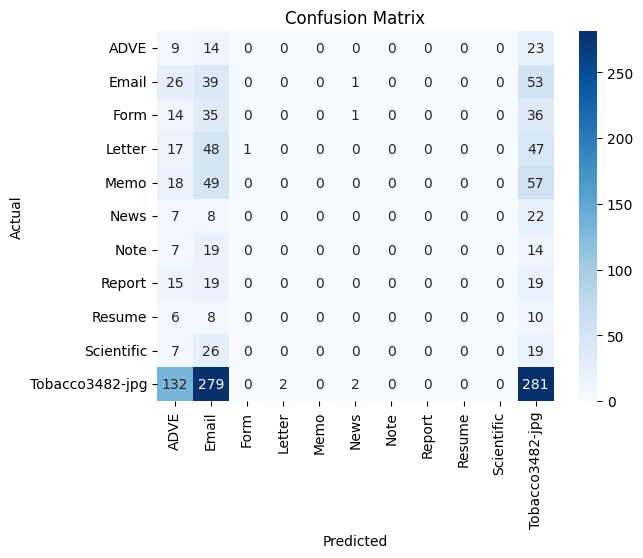

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
